# Document Rectifier

In [82]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#### Import Test Images

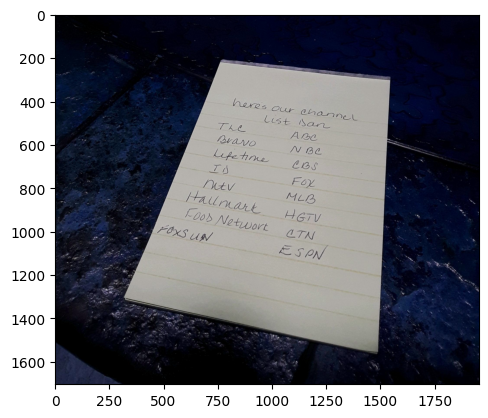

In [83]:
# img1 = cv2.imread('url1')
# img2 = cv2.imread('url2')
img = cv2.imread('bebi64i3kbb31.jpg')
plt.imshow(img)

### Corner input

In [84]:
# print("Enter corner coordinates as pairs: x, y\n")
# cornerA = input("A: ")
# cornerB = input("B: ")
# cornerC = input("C: ")
# cornerD = input("D: ")
cornerA = "760, 210"
cornerB = "320, 1320"
cornerC = "1460, 1560"
cornerD = "1530, 290"

corners = [cornerA, cornerB, cornerC, cornerD]
temp = []
for corner in corners:
    temp.append(corner.split(','))

corners = []
for pair in temp:
    x, y = map(eval, pair)
    corners.append((x, y))

# print(corners)

[(760, 210), (320, 1320), (1460, 1560), (1530, 290)]


### Find the homography to map the image to the new space

In [85]:
newCorners = [(0,0), (0, 1950), (1700, 1950), (1700, 0)]

P = []
for i in range(4):
    x, y = corners[i][0], corners[i][1]
    u, v = newCorners[i][0], newCorners[i][1]
    P.append([x, y, 1, 0, 0, 0, -u*x, -u*y, -u])
    P.append([0, 0, 0, x, y, 1, -v*x, -v*y, -v])
P = np.asarray(P)
U, S, Vh = np.linalg.svd(P)
h = Vh[-1,:] / Vh[-1,-1]
H = h.reshape(3, 3)

print(H)

[[ 2.59557367e+00  1.02887605e+00 -2.18869996e+03]
 [-2.99122547e-01  2.87905451e+00 -3.77268311e+02]
 [ 4.71871718e-05  5.23667300e-04  1.00000000e+00]]


### Perform the warping operation

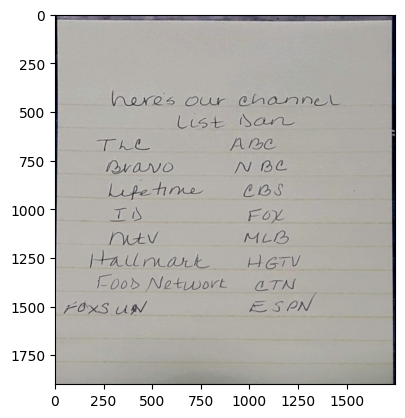

In [86]:
newImg = cv2.warpPerspective(img, H, (1750, 1900))
plt.imshow(newImg)

### Fully automated document recovery